# Fonctionnement de l'ascenseur spatial

Nous allons d'abord charger les librairies Python de Mathematiques (numpy) et de représentation graphique (matplotlib).   
Sans numpy nous n'aurions pas de fonction racine (sqrt).   
Quant à matplotlib, il s'agit d'une librairie qui fonctionne un peu comme la calculatrice du Lyçée et nous permet de tracer des courbes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Définissions ensuite les constantes utilisées:

In [44]:
G  = 6.67408E-11    # Constante de gravitation universelle en m(3)*s(-2)*kg(-1)
M  = 5.97242E24     # Masse de la terre en kg
Rt = 6.3781E6       # Rayon de la Terre en m, soit 6378 km   
#Rg = 42300          # Rayon de l'orbite geostationnaire en km

## 2. Movement orbital

Calcul de la vitesse de rotation de la terre, en radians par seconde:

In [45]:
Wt = (2*np.pi)/(24*60*60)
print("Vitesse de rotation de la terre = ",Wt,"Radians/seconde")

Vitesse de rotation de la terre =  7.27220521664304e-05 Radians/seconde


### Force gravitationnelle et force centrifuge:
Nous allons tracer sur le même qraphique les deux forces, gravitationelle et centrifuge.   
Le rayon r prendra des valeurs entre 6.000 km et 150.000 km

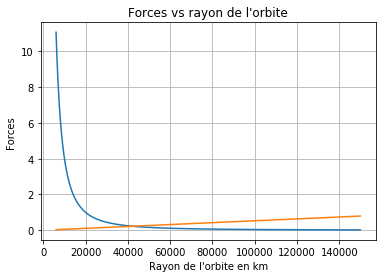

In [52]:
# Le rayon r prendra des valeurs entre 6.000 km et 150.000 km
r_km = np.arange(6000, 150000, 1)

ForceGravitation = 1E-6 * (G*M)/(r_km**2)
ForceCentrifuge  = 1E3  * r_km * Wt**2

plt.plot(r_km, ForceGravitation)
plt.plot(r_km, ForceCentrifuge)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Forces ")
plt.grid()
plt.title("Forces vs rayon de l'orbite")

plt.show()



### Calcul de la hauteur de l'orbite geostationnaire
Nous pouvons calculer la valeur exacte de l'orbite geostationnaire. Cette valeur doit 

In [49]:
Rg = ((G*M)/(Wt**2))**(1/3)
Hg = Rg - Rt

print("Rayon de l'orbite geostationnaire en metres:",int(Rg))
print("Hauteur de l'orbite geostationnaire en m:",int(Hg))

Rg = ((G*M)/(Wt**2))**(1/3) * 1E-3
Hg = Hg * 1E-3

print("Rayon de l'orbite geostationnaire en km:",int(Rg))
print("Hauteur de l'orbite geostationnaire en m:",int(Hg))


Rayon de l'orbite geostationnaire en metres: 42241224
Hauteur de l'orbite geostationnaire en m: 35863124
Rayon de l'orbite geostationnaire en km: 42241
Hauteur de l'orbite geostationnaire en m: 35863


### Vitesses aux différentes orbites
À toute orbite correspond une vitesse orbitale précise pour laquelle les forces d'attraction gravitationelle et centrifuge se compensent.

In [47]:
r_km = np.arange(6000, 150000, 1)
VitesseAngulaire = np.sqrt((G*M)/(r_km**3))

# 3. L'ascenseur

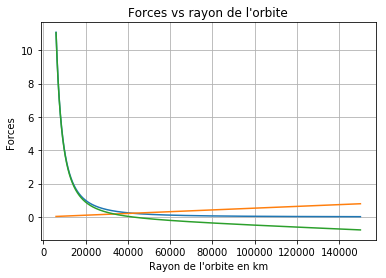

In [53]:
# Le rayon r prendra des valeurs entre 6.000 km et 150.000 km
r_km = np.arange(6000, 150000, 1)

ForceGravitation = 1E-6 * (G*M)/(r_km**2)
ForceCentrifuge  = 1E3  * r_km * Wt**2

ForceTotale = ForceGravitation - ForceCentrifuge

plt.plot(r_km, ForceGravitation)
plt.plot(r_km, ForceCentrifuge)
plt.plot(r_km, ForceTotale)


plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Forces ")
plt.grid()
plt.title("Forces vs rayon de l'orbite")

plt.show()



Nous observons que la Force totale s'annule pour le rayon de l'orbite géostationnaire. Cette courbe verte nous montre la force exercée sur chaque point du cable. La force est positive (attractive) au desssous de l'orbite géostationnaire et elle est négative (répulsive) au dessus.


# 4. Le cable

### Calcul du poids du cable et de sa tension:
Entre 6.378 km (Surface de la terre) et 42.241 km (Orbite géostationnaire), la tension du cable augmente progressivement, elle est maximale lorsque l'on atteint la station orbitale. Nous avons trouvé une formule qui donne cette tension, représentation graphique ci-dessous.


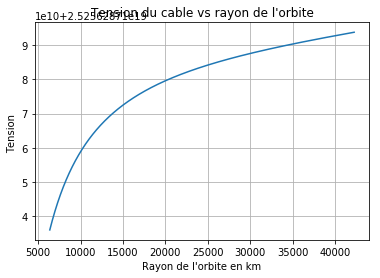

In [56]:
r_km = np.arange(6378, 42241, 1)

Tension_cable = G*M*( Rg*3/2 - 1/r_km + (r_km**2)/(2*Rg**3))

plt.plot(r_km, Tension_cable)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Tension ")
plt.grid()
plt.title("Tension du cable vs rayon de l'orbite")

plt.show()